In [1]:
## Importing labraries for text analyses


import pandas as pd
import re
import string
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords


nltk.download("wordnet")
stopwords = set(stopwords.words("english"))

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from matplotlib import rcParams

from nltk.tokenize import word_tokenize

rcParams["figure.figsize"] = 20,20
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objs as go


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maart\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
train = pd.read_csv(r"C:\Users\maart\OneDrive\Bureaublad\NLP\train.csv", index_col="id")
test = pd.read_csv(r"C:\Users\maart\OneDrive\Bureaublad\NLP\test.csv",index_col="id")
submission = pd.read_csv(r"C:\Users\maart\OneDrive\Bureaublad\NLP\sample_submission.csv", index_col="id")

In [3]:
train

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1


In [4]:

train = train.drop(["keyword","location"], axis = 1)
test = test.drop(["keyword","location"], axis = 1)

In [5]:
shape_of_train =train.shape
shape_of_test = test.shape

print(f"There are {shape_of_train[0]} rows and {shape_of_train[1]} columns in the trainset")
print(f"There are {shape_of_test[0]} rows and {shape_of_test[1]} columns in the trainset")

There are 7613 rows and 2 columns in the trainset
There are 3263 rows and 1 columns in the trainset


In [6]:
def get_wordnet_pos(woord):
    tag = nltk.pos_tag([woord])[0][1][0]
    tag_dict =  {"J": wordnet.ADJ,
             "N":wordnet.NOUN,
             "V":wordnet.VERB,
             "R":wordnet.ADV}
    
    return tag_dict.get(tag,wordnet.NOUN)
    

In [7]:
def cleaning_Text(text):
    # cleaning the text 
    text = text.lower() # Make The text lower
    text = re.sub("https?://\S+|www\.S+"," ",text) # removes all links
    text = re.sub("<.*?>"," ", text) # removes all html 
    text = re.sub("\[.*?\]"," ",text) # removes brackets
    text = re.sub("\w*\d\w*"," ", text) # removes words with numbers
    text = re.sub("\n"," ",text)
    return text
        
def remove_punct(text):
    
    table =str.maketrans('','',string.punctuation) # removes punctuation
    return text.translate(table)
    
    
def Remove_emoji(text):
    emoji_pattern = re.compile(pattern = "["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        "]+", flags = re.UNICODE)
    text = emoji_pattern.sub(r'',text)
    
    return text
    
    

In [8]:
train["text"]  = train["text"].apply(cleaning_Text)
test["text"]  = test["text"].apply(cleaning_Text)

In [9]:
train["text"] = train["text"].apply(remove_punct)
test["text"] = test["text"].apply(remove_punct)

In [10]:
lem = WordNetLemmatizer()

In [11]:
def Lemmatizer(text):
    text1 = word_tokenize(text)
    text1 = [lem.lemmatize(word, get_wordnet_pos(word)) for word in text1]
    return " ".join(text1)


In [12]:
train["text"]  = train["text"].apply(Lemmatizer)
test["text"]  = test["text"].apply(Lemmatizer)



In [13]:
train["text"]  = train["text"].apply(Remove_emoji)
test["text"]  = test["text"].apply(Remove_emoji)

In [14]:
test

,text
id,
0,just happen a terrible car crash
2,heard about earthquake be different city stay ...
3,there be a forest fire at spot pond geese be f...
9,apocalypse light spokane wildfire
11,typhoon soudelor kill in china and taiwan
...,...
10861,earthquake safety los angeles ûò safety faste...
10865,storm in ri bad than last hurricane my cityamp...
10868,green line derailment in chicago


In [15]:
count = train["target"].value_counts()

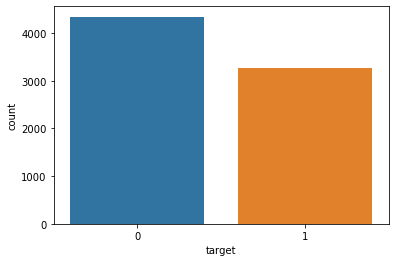

In [16]:
ax = sns.countplot(train["target"]);


In [17]:
round(train["target"].value_counts(normalize=True) * 100,2) 

0    57.03
1    42.97
Name: target, dtype: float64

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
trainii = " ".join(train[train["target"]== 1] ["text"])
traini  = " ".join(train[train["target"]==0] ["text"])

In [20]:
false = WordCloud(height=500, width = 500, background_color="black", stopwords=stopwords).generate(trainii)
positive = WordCloud(height=500, width = 500,background_color="black", stopwords=stopwords).generate(traini)


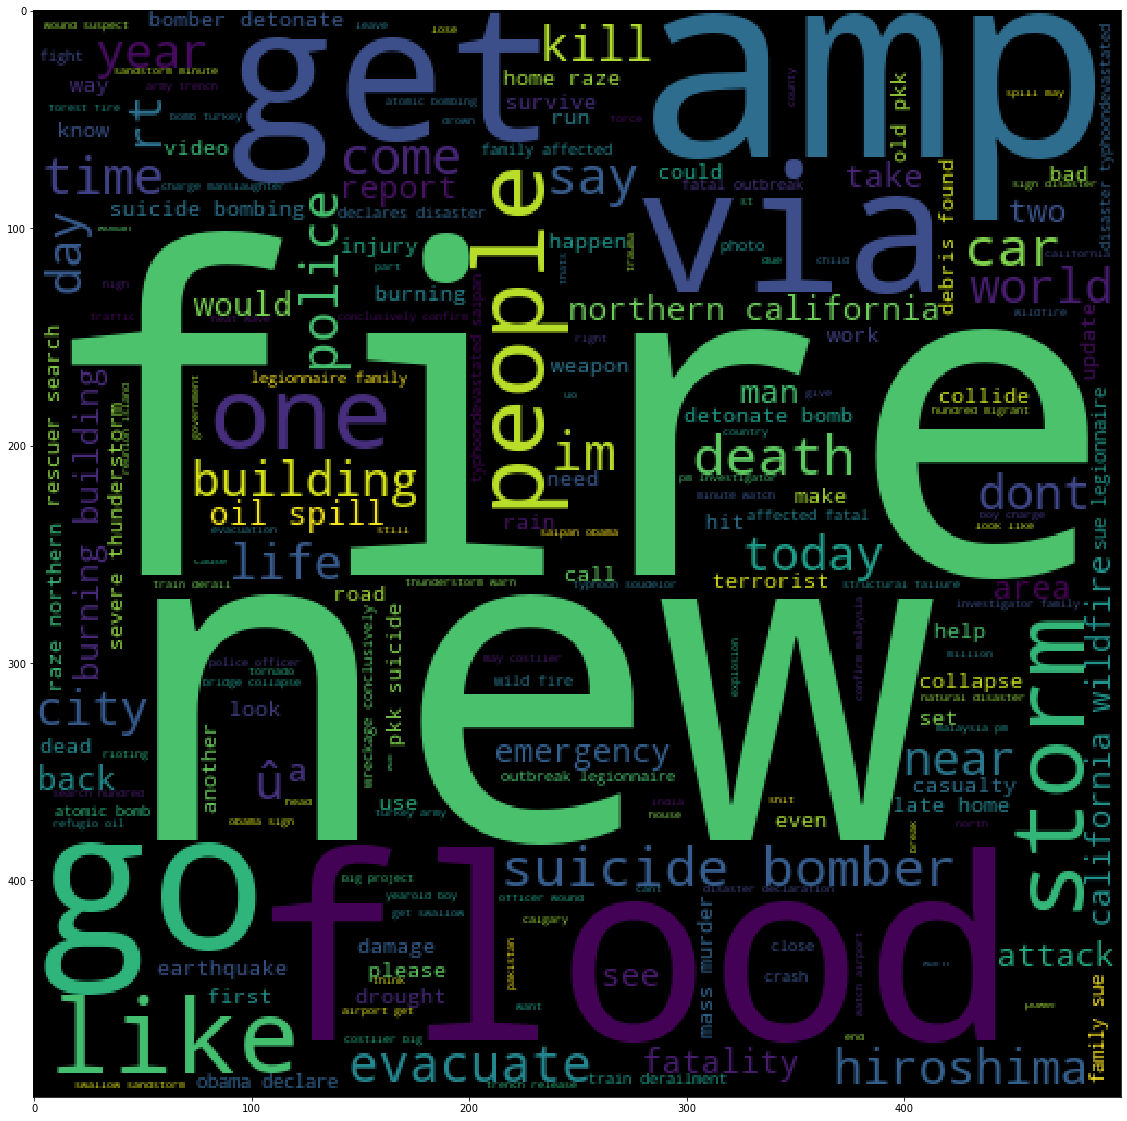

In [47]:
# ALL THE FALSE TWEETS
plt.figure(figsize=(20,20));
plt.imshow(false); 


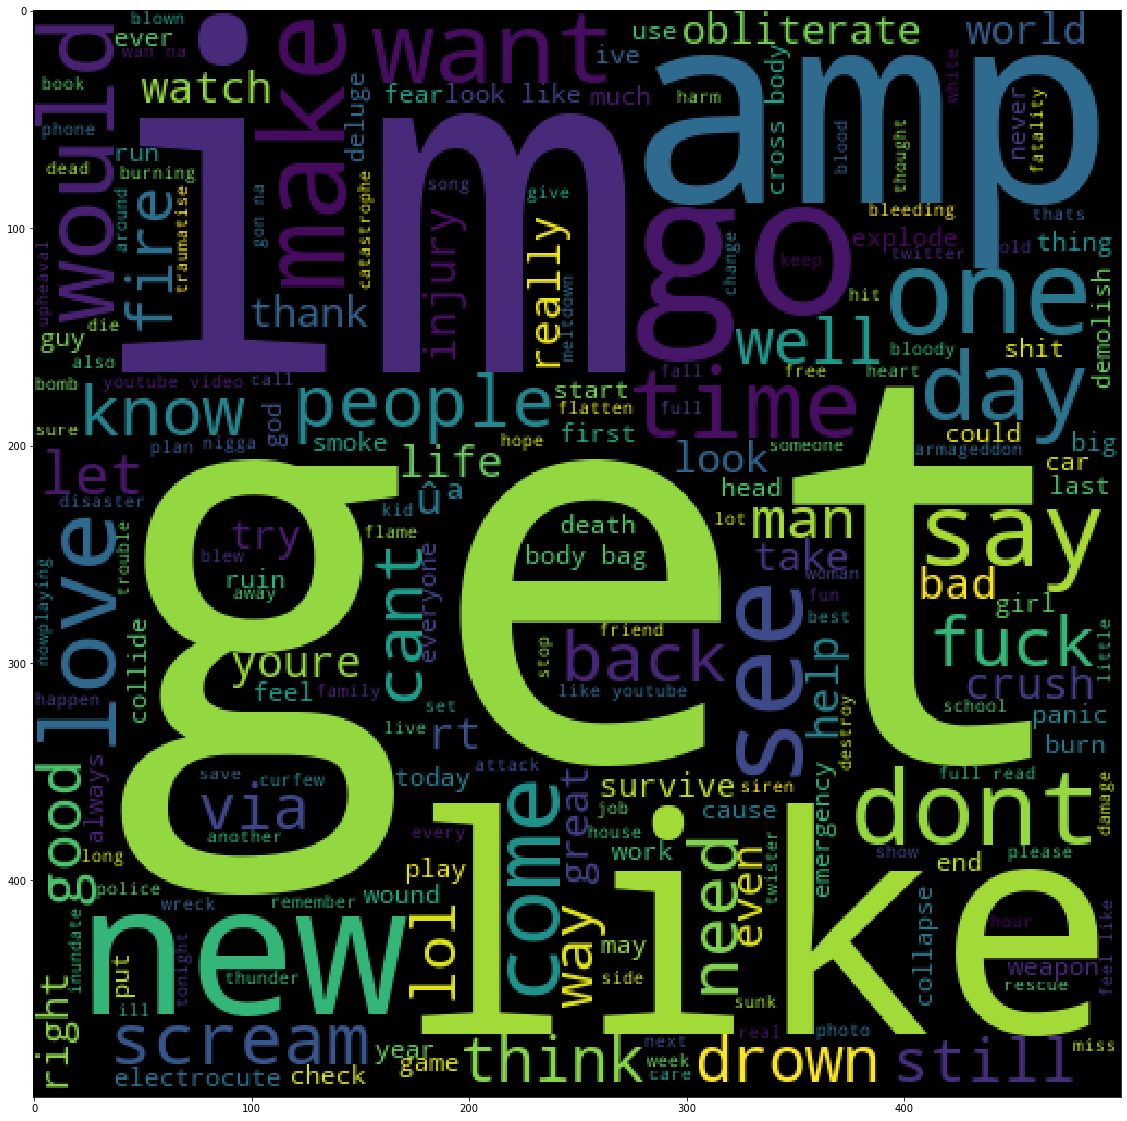

In [48]:
# ALL THE POSITIVE TWEETS
plt.figure(figsize=(20,20));
plt.imshow(positive);


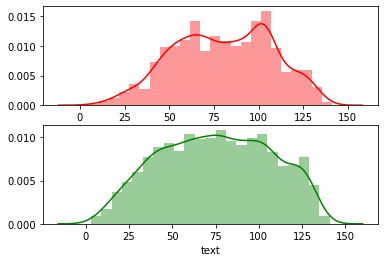

In [23]:
fig, (ax1, ax2) = plt.subplots(2,1)
len_Neg= train[train["target"]== 1]["text"].str.len()
sns.distplot(len_Neg, ax= ax1 , color = "r")

len_Pos= train[train["target"]== 0]["text"].str.len()
sns.distplot(len_Pos, ax= ax2, color="green")

In [24]:
def Top_words_2(text, n = None):
    
    vec = CountVectorizer(ngram_range=(2,2)).fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0)
    words_Freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_Freq = sorted(words_Freq, key = lambda x: x[1], reverse=True)
    return words_Freq[:n]
    

In [25]:
Top_words_2(train[train["target"]==1]["text"], n = 20)

[('in the', 145),
 ('of the', 119),
 ('have be', 70),
 ('suicide bomber', 60),
 ('kill in', 51),
 ('on the', 51),
 ('at the', 43),
 ('more than', 43),
 ('by the', 42),
 ('be the', 41),
 ('northern california', 41),
 ('it be', 38),
 ('and the', 38),
 ('oil spill', 38),
 ('on fire', 37),
 ('to the', 36),
 ('the late', 36),
 ('california wildfire', 36),
 ('to be', 36),
 ('the fatal', 36)]

In [26]:
Top_words_2(train[train["target"]==0]["text"], n = 20)

[('in the', 164),
 ('of the', 137),
 ('to the', 89),
 ('be the', 80),
 ('on the', 78),
 ('to be', 74),
 ('it be', 67),
 ('for the', 64),
 ('go to', 64),
 ('want to', 56),
 ('you be', 52),
 ('have to', 49),
 ('if you', 49),
 ('body bag', 48),
 ('do you', 43),
 ('at the', 43),
 ('and the', 41),
 ('will be', 38),
 ('cross body', 38),
 ('look like', 36)]

In [27]:
def Top_words_3(text, n = None):
    
    vec = CountVectorizer(ngram_range=(3,3)).fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0)
    words_Freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_Freq = sorted(words_Freq, key = lambda x: x[1], reverse=True)
    return words_Freq[:n]
    

In [28]:
Top_words_3(train[train["target"]==1]["text"], n = 20)

[('northern california wildfire', 29),
 ('more home raze', 29),
 ('home raze by', 29),
 ('the late more', 28),
 ('late more home', 28),
 ('raze by northern', 28),
 ('pkk suicide bomber', 28),
 ('suicide bomber who', 28),
 ('bomber who detonate', 28),
 ('who detonate bomb', 28),
 ('detonate bomb in', 28),
 ('by northern california', 27),
 ('old pkk suicide', 27),
 ('family to sue', 26),
 ('to sue over', 26),
 ('sue over legionnaire', 26),
 ('more than family', 26),
 ('than family affected', 26),
 ('family affected by', 26),
 ('affected by the', 26)]

In [29]:
Top_words_3(train[train["target"]==0]["text"], n = 20)

[('like youtube video', 35),
 ('cross body bag', 23),
 ('reddit will now', 21),
 ('will now quarantine', 21),
 ('full read by', 20),
 ('be go to', 19),
 ('now quarantine offensive', 19),
 ('quarantine offensive content', 18),
 ('be my pick', 17),
 ('my pick for', 17),
 ('pick for fan', 17),
 ('for fan army', 17),
 ('youtube video from', 17),
 ('reddits new content', 16),
 ('new content policy', 16),
 ('ban or quarantine', 16),
 ('stock market crash', 16),
 ('read by ebay', 15),
 ('ignition knock detonation', 15),
 ('content policy go', 15)]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
tf = TfidfVectorizer()
next = tf.fit_transform(train["text"])

In [33]:
next

<7613x14218 sparse matrix of type '<class 'numpy.float64'>'
	with 93962 stored elements in Compressed Sparse Row format>

In [34]:

y = train["target"]


In [35]:
# split the dataframe
X_train, X_test, y_train, y_test =train_test_split(next,y , test_size =0.2, random_state = 42, shuffle = False)

In [36]:
# importing the modes

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


In [37]:

classifiers = {
    "Logistic_regression" : LogisticRegression(),
    "Desicion_tree_classifier": DecisionTreeClassifier(),
    "XGBClassifier": XGBClassifier(),
    "SVC": SVC(),
    "RF": RandomForestClassifier(),
    "GradientBoostclas": GradientBoostingClassifier(),
    "Adaboost classifier" : AdaBoostClassifier()
}

In [38]:
# what is the best model?
for key, classifier in classifiers.items():
   
    classifier.fit(X_train,y_train)
    score = cross_val_score(classifier, X_train,y_train, cv=5).mean()
    print(f"classifier: {key}  {round(score,2)}")

classifier: Logistic_regression  0.71
classifier: Desicion_tree_classifier  0.6
classifier: XGBClassifier  0.65
classifier: SVC  0.7
classifier: RF  0.67
classifier: GradientBoostclas  0.65
classifier: Adaboost classifier  0.65


In [39]:
import numpy as np

In [40]:
params = {
         "C": [0.001,0.01,0.1,1,10,100,150],
        "penalty":['l1',"l2"]}

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
# Hyperparameter tuning 
log = LogisticRegression()
grid = GridSearchCV(log, param_grid=params)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'C': 1, 'penalty': 'l2'}


In [43]:
#The model 
logi = LogisticRegression(C = 1, penalty="l2")
logi.fit(X_train,y_train)
predict = logi.predict(X_test)
score = round(accuracy_score(y_test,predict),2)
print(f"The logistic regression score is: {score}")

The logistic regression score is: 0.78
